# Partie 2 : Q1

In [1]:
#Yassine Karimi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


### 1. Dataset

In [2]:
#Yassine Karimi

dataset=pd.read_csv("occupancy.csv")

In [3]:
#Yassine Karimi
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [4]:
#Yassine Karimi
dataset.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


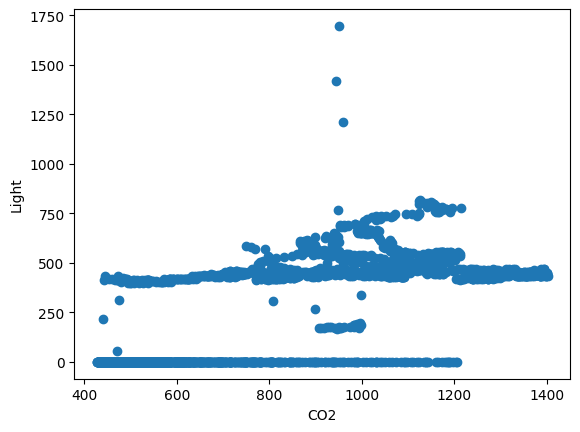

In [5]:
#Yassine Karimi
plt.plot(dataset["CO2"],dataset["Light"],'o')
plt.xlabel('CO2')
plt.ylabel('Light')
plt.show()

In [6]:
#Yassine Karimi

df=dataset[['Occupancy','CO2','Light']]


In [7]:
#Yassine Karimi

df.isnull().values.sum()

0

In [8]:
#Yassine Karimi


In [9]:
#Yassine Karimi

X= df[['CO2','Light']]
y=df['Occupancy']

In [10]:
#Yassine Karimi

y.shape

(2665,)

In [11]:
#Yassine Karimi
X.shape

(2665, 2)

In [12]:
#Yassine Karimi
x=X.values.reshape(2665,2)
y=y.values.reshape(2665,1)

In [13]:
#Yassine Karimi
y.shape

(2665, 1)

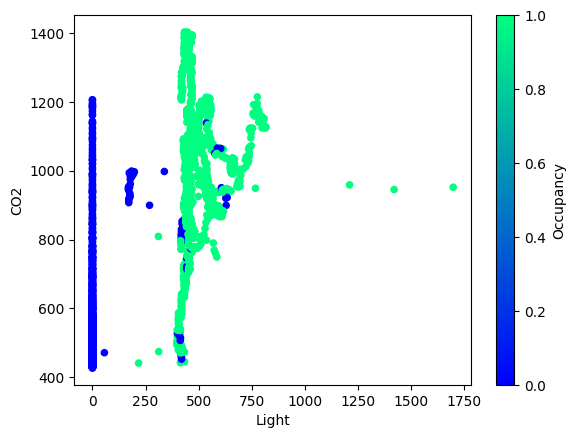

In [14]:
dataset.plot.scatter(x='Light',y='CO2', c='Occupancy', colormap='winter')
plt.show()

### Normalisation 

In [15]:
#Yassine Karimi
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(x)



X

array([[0.10694007, 1.56686218],
       [0.14521407, 1.53968001],
       [0.17688126, 1.51676171],
       ...,
       [1.39390353, 2.4934545 ],
       [1.38433502, 2.47746498],
       [1.38775235, 2.41750431]])

### 2. Modèle

In [16]:
#Yassine Karimi

# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [17]:
#Yassine Karimi
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


In [18]:
#Yassine Karimi

# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [19]:
#Yassine Karimi

def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [20]:
#Yassine Karimi
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [21]:
#Yassine Karimi
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

 ### 3.Prédiction

In [22]:
#Yassine Karimi

def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 4. Modèle final

In [23]:
#Yassine Karimi

def regression_logistique(X, y, learning_rate=0.1, n_iter=3000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

### 5.Evaluation du modèle et Visualisation


array([[0.7505615 ],
       [4.06828154]])

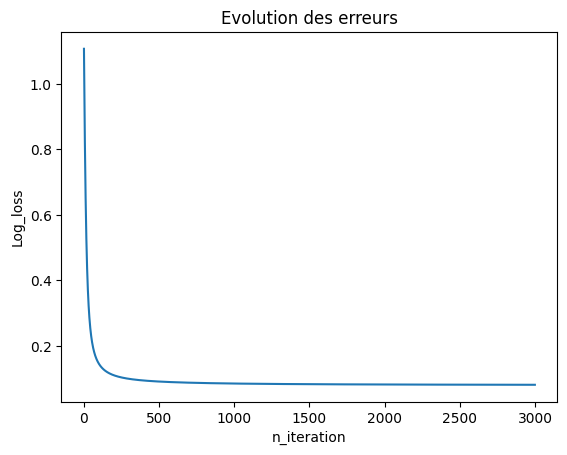

In [24]:
#Yassine Karimi

W,b=regression_logistique(X, y)
W

In [25]:
#Yassine Karimi
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))

[[0.98846383]
 [0.98749209]
 [0.98660432]
 ...
 [0.99989757]
 [0.9998899 ]
 [0.99985985]]
Accuracy= 0.9786116322701689


[0.17914476]
[False]
[0.26957902]
[False]
[0.87281642]
[ True]


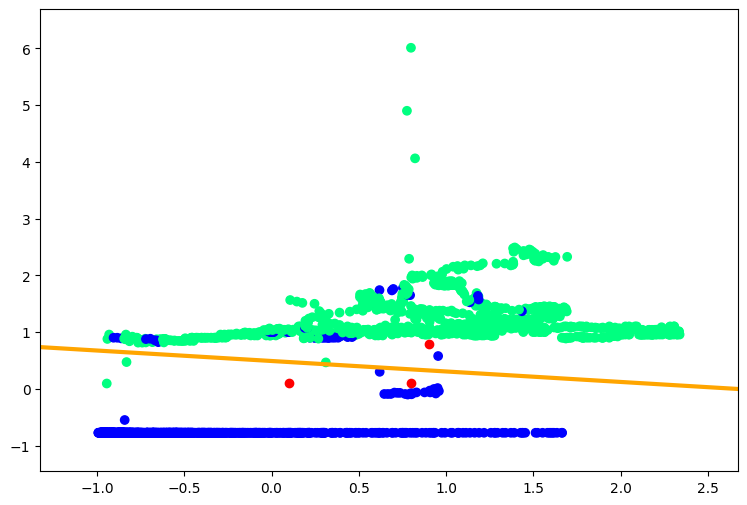

In [26]:
# Visualize the dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

# Set the limits of the plot
x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
x2_min, x2_max = np.min(X[:, 1]), np.max(X[:, 1])
x1_range = x1_max - x1_min
x2_range = x2_max - x2_min
x1_min -= 0.1 * x1_range
x1_max += 0.1 * x1_range
x2_min -= 0.1 * x2_range
x2_max += 0.1 * x2_range
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

# Draw the decision boundary
x1 = np.linspace(x1_min, x1_max, 200)
x2 = (-W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Predict the class of new elements
new_1 = np.array([0.1, 0.1])
new_2 = np.array([0.8, 0.1])
new_3 = np.array([0.9, 0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

### 6.Matrcie de Confusion

In [27]:
#Yassine Karimi
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[0.98846383]
 [0.98749209]
 [0.98660432]
 ...
 [0.99989757]
 [0.9998899 ]
 [0.99985985]]
[[1638   55]
 [   2  970]]


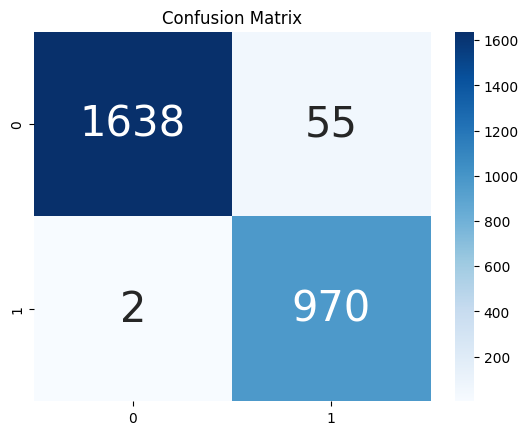

In [28]:
#Yassine Karimi

# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Question 2

In [29]:
#Yassine Karimi
X2 = dataset[['Temperature','Humidity','Light','CO2','HumidityRatio']]

X2

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.700000,26.272000,585.200000,749.200000,0.004764
141,23.718000,26.290000,578.400000,760.400000,0.004773
142,23.730000,26.230000,572.666667,769.666667,0.004765
143,23.722500,26.125000,493.750000,774.750000,0.004744
144,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...
2800,24.290000,25.700000,808.000000,1150.250000,0.004829
2801,24.330000,25.736000,809.800000,1129.200000,0.004848
2802,24.330000,25.700000,817.000000,1125.800000,0.004841
2803,24.356667,25.700000,813.000000,1123.000000,0.004849


In [30]:
#Yassine Karimi
from sklearn.preprocessing import MinMaxScaler




# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
X2 = scaler.fit_transform(X2)


# Print the normalized data
print(X2)

[[0.83168317 0.44513204 0.34479305 0.33003334 0.70421197]
 [0.8359604  0.44705255 0.34078657 0.34152347 0.70830847]
 [0.83881188 0.44065084 0.33740855 0.35103018 0.70468898]
 ...
 [0.98138614 0.38410243 0.48136692 0.71638882 0.74113545]
 [0.98772277 0.38410243 0.47901016 0.71351629 0.74489576]
 [1.         0.38214635 0.47017234 0.71454219 0.75051096]]


In [31]:
#Yassine Karimi
X2.shape

(2665, 5)

In [32]:
#Yassine Karimi
y.shape

(2665, 1)

array([[-4.31030782],
       [ 2.24402906],
       [27.99747001],
       [ 3.2318895 ],
       [ 1.42595263]])

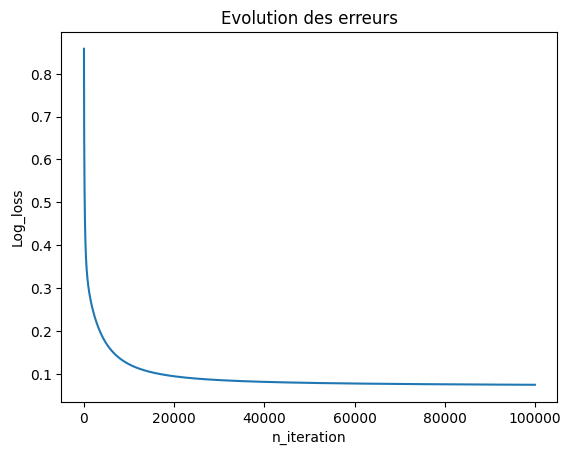

In [33]:
#Yassine Karimi

W2,b2=regression_logistique(X2, y,0.1,100000)
W2